In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
POINTS = 500

In [3]:
def f(x):
    return np.sin(2*x) * np.sin(x**2/np.pi)

In [4]:
def monomial_base(i):
    return lambda x: x**i

In [40]:
def trigonomerical_base(i):
    k = (i + 1) // 2
    if i % 2 == 1:
        return lambda x: np.sin(k * x)
    return lambda x: np.cos(k * x)

In [ ]:
def legendre_base(i):
    

In [32]:
def calculate_matrix_elem(row, col, x_arr, wage_fun, base_generator):
    fi_k = base_generator(row)
    fi_j = base_generator(col)
    return np.sum(wage_fun(x_arr) * fi_k(x_arr) * fi_j(x_arr))

In [7]:
def calculate_vector_elem(row, x_arr, y_arr, wage_fun, base_generator):
    fi_k = base_generator(row)
    return np.sum(wage_fun(x_arr) * y_arr * fi_k(x_arr))

In [8]:
def generate_eq_sys_matrix(m, x_arr, wage_fun, base_generator):
    result = np.empty((m,m))
    for i in range(m):
        for j in range(m):
            result[i][j] = calculate_matrix_elem(i, j, x_arr, wage_fun, base_generator)
    return result

In [9]:
def generate_eq_sys_dependent_vector(m, x_arr, y_arr, wage_fun, base_generator):
    result = np.empty((m,))
    for i in range(m):
        result[i] = calculate_vector_elem(i, x_arr, y_arr, wage_fun, base_generator)
    return result

In [10]:
def compute_a_coeff(m, x_arr, y_arr, wage_fun, base_generator):
    g = generate_eq_sys_matrix(m, x_arr, wage_fun, base_generator)
    b = generate_eq_sys_dependent_vector(m, x_arr, y_arr, wage_fun, base_generator)
    return np.linalg.solve(g, b)

In [11]:
def print_errors(y_print, p_print):
    print('Błąd interpolacji(norma euklidesowa):', np.linalg.norm(y_print-p_print) / POINTS)
    print('Błąd interpolacji(norma maksimum):', np.linalg.norm(y_print-p_print, ord=np.inf))

In [12]:
def print_plots(x_approx, x_print, y_approx, y_print, p_print):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x_print, p_print, label="W(x)")
    ax.plot(x_print, y_print, label="f(x)")
    ax.plot(x_approx, y_approx, '*', label='Węzły aproksymacji')
    ax.set_title('elo')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend()
    plt.show()

In [13]:
def calculate_polynomial_value(x, polynomial, m):
    values = np.empty((m,))
    for i in range(m):
        monomial = polynomial[i]
        values[i] = monomial(x)
    return np.sum(values)

In [14]:
def evaluate_fun(fun, x):
    return fun(x)

In [15]:
def evaluate_approximation_polynomial(x, a_coeff, base):
    m = len(a_coeff)
    values = [] #np.empty((m,))
    for i in range(m):
        monomial = base(i)
        value = a_coeff[i] * monomial(x)
        values.append(value) # = evaluate_fun(monomial, x)
    return sum(values)

In [36]:
def approximate(m, x_print, x_approx, y_approx, wage_fun, base_generator):
    a = compute_a_coeff(m, x_approx, y_approx, wage_fun, base_generator)
    return evaluate_approximation_polynomial(x_print, a, base_generator)

In [17]:
def exercise(a, b, n, m, base):
    print("Stopień wielomianu: {0:d}, liczba węzłów: {1:d}".format(m, n))
    m = m + 1
    x_approx = np.linspace(a, b, n)
    x_print = np.linspace(a, b, POINTS)
    y_approx = f(x_approx)
    y_print = f(x_print)
    p_print = approximate(m, x_print, x_approx, y_approx, wage_fun=lambda x: 1, base_generator=base)
    #print(p_print)
    print_errors(y_print, p_print)
    print_plots(x_approx, x_print, y_approx, y_print, p_print)

Stopień wielomianu: 5, liczba węzłów: 50
Błąd interpolacji(norma euklidesowa): 0.016257564131524068
Błąd interpolacji(norma maksimum): 0.6421268193236273


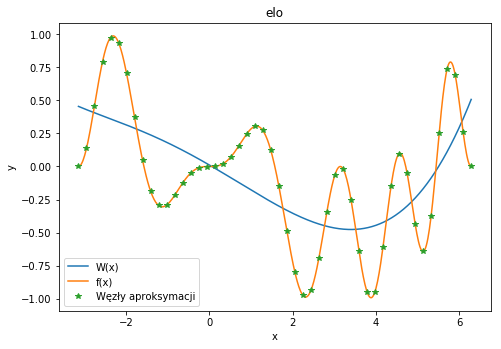

In [37]:
exercise(-np.pi, 2 * np.pi, 50, 5, monomial_base)

Stopień wielomianu: 30, liczba węzłów: 50
Błąd interpolacji(norma euklidesowa): 0.016407208947397552
Błąd interpolacji(norma maksimum): 0.981303331906149


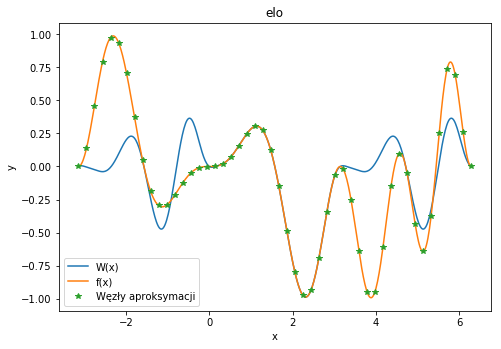

In [39]:
exercise(-np.pi, 2 * np.pi, 50, 30, trigonomerical_base)

In [87]:
2**0

1

In [99]:
f = trigonomerical_base(0)
f(0)

1.0

In [100]:
print(trigonomerical_base(2))

<function trigonomerical_base.<locals>.<lambda> at 0x7f2f0e89e730>
